# 데이터 처리 분야별 패키지 알아보기
* 표 형식 데이터 - pandas, numpy, dask
* 스프레드 시트 데이터 - pandas, openpyxl
* 시각화 - matplotlib, seaborn, plotly, bokeh, altair
* 기계학습 - pytorch, tensorflow, scikit-learn, keras
* 이미지 데이터 - opencv, pillow
* 데이터 베이스 - pymysql, pymongo

https://seaborn.pydata.org/examples/index.html  
https://docs.bokeh.org/en/latest/docs/gallery.html   
https://altair-viz.github.io/  
: 필요한 그래프 찾을 수 있음

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

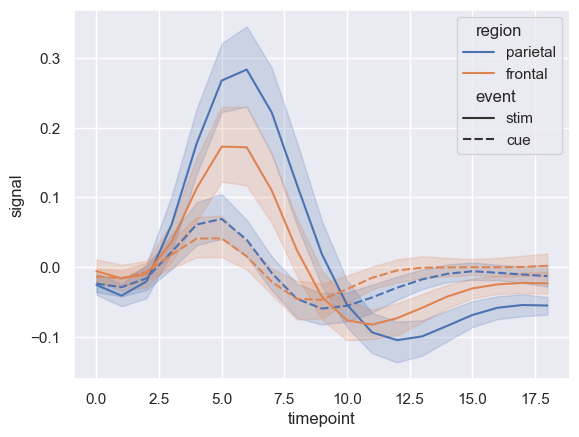

In [1]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event", # hue는 오른쪽 상단에 있는 표 , style은 실선, 점선
             data=fmri)

In [2]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [3]:
import pandas as pd

In [60]:
df = pd.read_csv("C:/Users/user/Downloads/경상남도_버스업체경영수지분석_원가_표준원가정보_20220818/CS_T_T_STD_COST.csv", encoding='cp949')

In [12]:
df.head(2)

,연번,업체아이디,킬로미터당원가,관할행정아이디,입력일자,최종처리자아이디,수정일자,영역분류,일일대당원가,평가연도,평가차수
0,1,1041,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19
1,2,1000,461,30.0,2012-07-10,1,2012-07-10,2,305872,2012,19


# 실습
* 위 데이터를 이용해 선 그래프를 그리기
* 분류 대상: 영역분류 (1, 4)
* 표현할 값: 평가연도에 따른 일일 대당 원가

In [13]:
df['영역분류'].unique()

array([1, 2, 4, 3], dtype=int64)

In [14]:
df['영역분류'][1]

2

In [29]:
df[(df['영역분류'] == 1) &~ (df['영역분류'] == 4)]

,연번,업체아이디,킬로미터당원가,관할행정아이디,입력일자,최종처리자아이디,수정일자,영역분류,일일대당원가,평가연도,평가차수
0,1,1041,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19
6,7,1030,479,7.0,2012-07-15,1,2012-07-10,1,248352,2012,19
7,8,1044,1,NaN,2012-07-09,1,2012-07-09,1,2,2012,20
8,9,1030,1,7.0,2012-07-09,1,2012-07-09,1,2,2012,20
9,10,1044,1,7.0,2012-07-09,1,2012-07-09,1,2,2012,20
...,...,...,...,...,...,...,...,...,...,...,...
3274,3275,1036,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3275,3276,1038,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3276,3277,1039,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3277,3278,1025,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19


In [40]:
df = df[(df['영역분류'] == 1) | (df['영역분류'] == 4)]

In [41]:
df

,연번,업체아이디,킬로미터당원가,관할행정아이디,입력일자,최종처리자아이디,수정일자,영역분류,일일대당원가,평가연도,평가차수
0,1,1041,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19
6,7,1030,479,7.0,2012-07-15,1,2012-07-10,1,248352,2012,19
7,8,1044,1,NaN,2012-07-09,1,2012-07-09,1,2,2012,20
8,9,1030,1,7.0,2012-07-09,1,2012-07-09,1,2,2012,20
9,10,1044,1,7.0,2012-07-09,1,2012-07-09,1,2,2012,20
...,...,...,...,...,...,...,...,...,...,...,...
3274,3275,1036,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3275,3276,1038,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3276,3277,1039,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3277,3278,1025,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19


In [42]:
df[df['영역분류'] == 4]

,연번,업체아이디,킬로미터당원가,관할행정아이디,입력일자,최종처리자아이디,수정일자,영역분류,일일대당원가,평가연도,평가차수
11,12,1031,1,19.0,2012-07-09,1,2012-07-09,4,2,2012,20
43,44,1001,1,14.0,2012-07-09,1,2012-07-09,4,2,2012,20
47,48,1016,1,15.0,2012-07-09,1,2012-07-09,4,2,2012,20
51,52,1026,1,17.0,2012-07-09,1,2012-07-09,4,2,2012,20
54,55,1031,1,11.0,2012-07-09,1,2012-07-09,4,2,2012,20
...,...,...,...,...,...,...,...,...,...,...,...
3244,3245,1007,301,13.0,2012-07-10,1,2012-07-10,4,106606,2012,19
3245,3246,1021,529,12.0,2012-07-10,1,2012-07-10,4,224186,2012,19
3246,3247,1031,296,18.0,2012-07-10,1,2012-07-10,4,180338,2012,19
3247,3248,1008,296,18.0,2012-07-10,1,2012-07-10,4,180338,2012,19


In [43]:
import matplotlib.pyplot as plt

In [44]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [45]:
plt.rcParams['font.family'] = 'NanumGothic'

<AxesSubplot:xlabel='평가연도', ylabel='일일대당원가'>

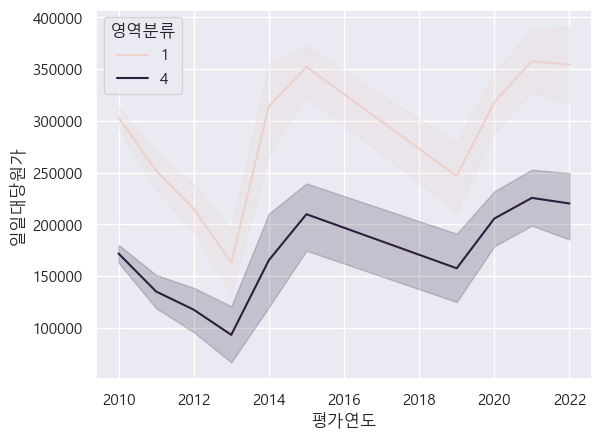

In [49]:
sns.set_theme(style="darkgrid")
plt.rcParams['font.family'] = 'Malgun Gothic'

#set 다음에 폰트 지정, set 하면 초기화됨
sns.lineplot(x="평가연도", y="일일대당원가",
             hue="영역분류", 
             data=df)

In [23]:
import matplotlib as mpl
mpl.matplotlib_fname()

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

---
# 선생님 실습

In [32]:
df

,연번,업체아이디,킬로미터당원가,관할행정아이디,입력일자,최종처리자아이디,수정일자,영역분류,일일대당원가,평가연도,평가차수
0,1,1041,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19
1,2,1000,461,30.0,2012-07-10,1,2012-07-10,2,305872,2012,19
2,3,1006,511,30.0,2012-07-10,1,2012-07-10,2,289164,2012,19
3,4,1010,494,30.0,2012-07-10,1,2012-07-10,2,214690,2012,19
4,5,1011,374,30.0,2012-07-10,1,2012-07-10,2,219583,2012,19
...,...,...,...,...,...,...,...,...,...,...,...
3274,3275,1036,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3275,3276,1038,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3276,3277,1039,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3277,3278,1025,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19


In [33]:
query_expr = '영역분류 == 1 or 영역분류 == 4'
df2 = df.query(query_expr)

In [34]:
df2

,연번,업체아이디,킬로미터당원가,관할행정아이디,입력일자,최종처리자아이디,수정일자,영역분류,일일대당원가,평가연도,평가차수
0,1,1041,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19
6,7,1030,479,7.0,2012-07-15,1,2012-07-10,1,248352,2012,19
7,8,1044,1,NaN,2012-07-09,1,2012-07-09,1,2,2012,20
8,9,1030,1,7.0,2012-07-09,1,2012-07-09,1,2,2012,20
9,10,1044,1,7.0,2012-07-09,1,2012-07-09,1,2,2012,20
...,...,...,...,...,...,...,...,...,...,...,...
3274,3275,1036,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3275,3276,1038,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3276,3277,1039,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3277,3278,1025,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19


In [35]:
df2[df2['영역분류'] == 4]

,연번,업체아이디,킬로미터당원가,관할행정아이디,입력일자,최종처리자아이디,수정일자,영역분류,일일대당원가,평가연도,평가차수
11,12,1031,1,19.0,2012-07-09,1,2012-07-09,4,2,2012,20
43,44,1001,1,14.0,2012-07-09,1,2012-07-09,4,2,2012,20
47,48,1016,1,15.0,2012-07-09,1,2012-07-09,4,2,2012,20
51,52,1026,1,17.0,2012-07-09,1,2012-07-09,4,2,2012,20
54,55,1031,1,11.0,2012-07-09,1,2012-07-09,4,2,2012,20
...,...,...,...,...,...,...,...,...,...,...,...
3244,3245,1007,301,13.0,2012-07-10,1,2012-07-10,4,106606,2012,19
3245,3246,1021,529,12.0,2012-07-10,1,2012-07-10,4,224186,2012,19
3246,3247,1031,296,18.0,2012-07-10,1,2012-07-10,4,180338,2012,19
3247,3248,1008,296,18.0,2012-07-10,1,2012-07-10,4,180338,2012,19


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:xlabel='평가연도', ylabel='일일대당원가'>

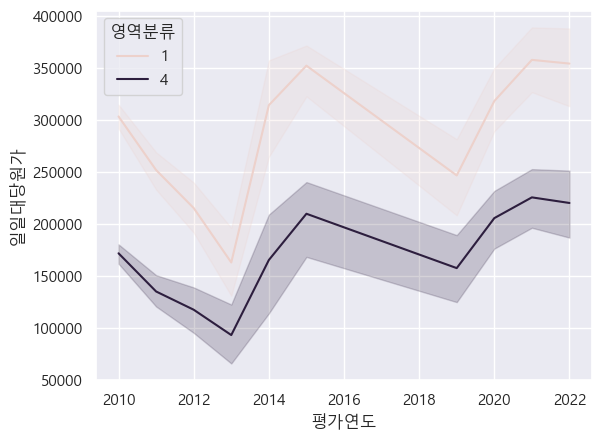

In [38]:
sns.lineplot(x="평가연도", y="일일대당원가",
             hue="영역분류", 
             data=df2)

In [54]:
value1 = 1
value2 = 1041

In [55]:
query_expr = '영역분류 == @value1 and 업체아이디 == @value2'
df.query(query_expr)

,연번,업체아이디,킬로미터당원가,관할행정아이디,입력일자,최종처리자아이디,수정일자,영역분류,일일대당원가,평가연도,평가차수
0,1,1041,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19
79,80,1041,1,3.0,2013-07-15,1,2013-07-15,1,2,2013,24
92,93,1041,737,3.0,2013-07-15,1,2013-07-15,1,307272,2013,26
171,172,1041,1,3.0,2013-07-15,1,2013-07-15,1,2,2013,25
320,321,1041,737,3.0,2013-09-01,1,2013-09-01,1,307272,2013,28
354,355,1041,1,3.0,2020-11-15,1,2020-11-15,1,1,2020,56
401,402,1041,489,3.0,2020-12-02,1,2020-12-02,1,435280,2020,59
422,423,1041,508,3.0,2015-10-12,10,2015-10-12,1,353967,2015,35
497,498,1041,1,3.0,2019-08-26,1,2019-08-26,1,1,2019,45
636,637,1041,420,3.0,2021-04-28,1,2021-09-16,1,419013,2021,62


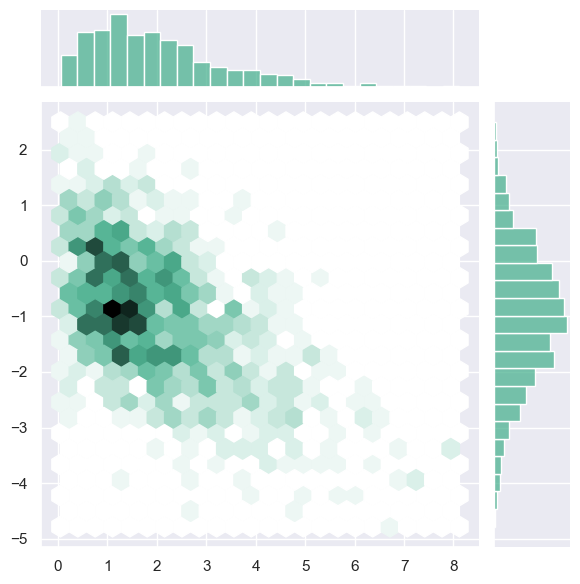

In [70]:
import numpy as np
sns.set_theme(style="darkgrid")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

# 실습
* 위 데이터에서 킬로미터당원가와 일일대당원가의 관계를 시각화해보자
* hexbin plot을 이용한다

In [61]:
df

,연번,업체아이디,킬로미터당원가,관할행정아이디,입력일자,최종처리자아이디,수정일자,영역분류,일일대당원가,평가연도,평가차수
0,1,1041,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19
1,2,1000,461,30.0,2012-07-10,1,2012-07-10,2,305872,2012,19
2,3,1006,511,30.0,2012-07-10,1,2012-07-10,2,289164,2012,19
3,4,1010,494,30.0,2012-07-10,1,2012-07-10,2,214690,2012,19
4,5,1011,374,30.0,2012-07-10,1,2012-07-10,2,219583,2012,19
...,...,...,...,...,...,...,...,...,...,...,...
3274,3275,1036,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3275,3276,1038,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3276,3277,1039,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3277,3278,1025,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19


In [63]:
rs = np.random.RandomState(11)

In [65]:
print(rs)

RandomState(MT19937)


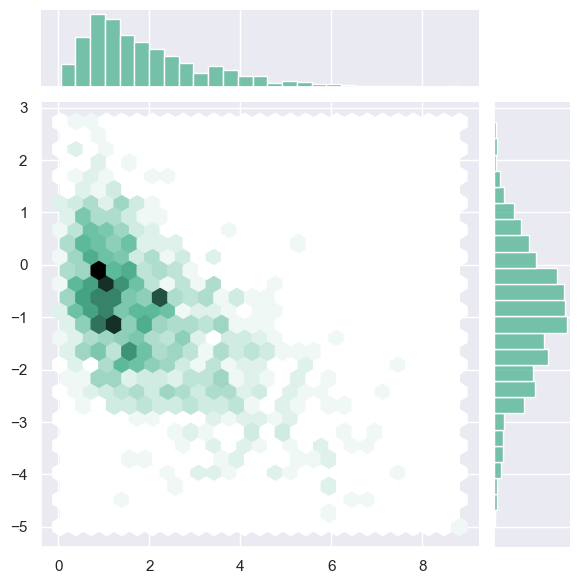

In [77]:
rs = np.random.RandomState(df['킬로미터당원가'])
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

In [78]:
rs = np.random.RandomState(df['킬로미터당원가'])
print(rs)

RandomState(MT19937)


In [79]:
x = rs.gamma(2, size=1000)
print(x)

[1.23026965 1.46515571 1.552521   1.82415749 1.45921779 3.37495966
 3.54881939 1.22621925 0.58926201 1.49591502 3.25595758 2.02388651
 0.38949172 0.58569631 3.64506745 1.5182238  2.12582587 4.20890521
 0.23489551 2.98508963 0.99712339 1.33221077 1.48498325 1.38538551
 2.67707841 1.35984357 1.18021928 1.34358672 3.37821595 2.21013353
 0.6643308  0.93255154 0.91213634 2.28046897 1.26217998 1.83653347
 0.42530545 0.37023298 1.54569424 2.74117584 0.89025877 0.93176817
 4.1413859  1.09951532 0.66006406 2.59279149 1.4113568  4.75050926
 3.01395612 1.86554227 1.82415527 1.03984839 3.0624418  2.08831514
 1.70424166 2.45123887 0.86126106 0.30804561 1.23008001 3.68271288
 1.16392422 4.72723365 0.26700058 0.97606671 2.91162793 2.09037006
 0.74891719 0.99289893 2.10811707 3.05166972 2.71039832 0.71874716
 1.3129443  1.69162006 2.28102783 1.22031448 1.24467676 0.27892451
 1.6216868  0.4824367  2.00188093 0.42386701 0.85910756 1.20580691
 1.07965381 1.60853662 1.05187175 2.30130706 1.87809221 0.4042

In [81]:
rs.normal(size=1000)

array([-2.87080063e-01,  2.38905921e+00, -1.94617687e-01, -1.17124498e+00,
       -8.60857409e-02, -6.54800818e-02,  1.63233892e+00,  7.53315761e-01,
       -1.74085417e+00, -1.62697452e+00, -1.04739209e+00,  7.53533145e-01,
        1.99066200e+00,  1.17498295e+00,  6.97579843e-01,  5.56023636e-01,
       -4.25174746e-01,  8.36217253e-01, -2.29663499e+00,  3.59120773e-01,
       -1.09655447e+00,  1.17122881e+00, -3.79020462e-01,  1.45773014e+00,
        7.79969969e-01,  7.15251680e-01,  1.24241186e+00, -9.70815688e-02,
        1.02186141e+00,  8.75256028e-01, -1.01984100e+00,  2.86018679e-01,
       -5.92727820e-01, -4.06936407e-01,  7.63609082e-01,  9.23563636e-01,
        5.10954407e-02, -1.54995424e+00, -2.08507362e-03, -9.54447237e-01,
       -3.73477035e-01,  2.77640093e-01, -1.40387273e-01,  7.88132773e-02,
        4.48784168e-02, -2.94172325e-01,  3.37329364e-01, -1.13199865e+00,
        3.99295542e-01,  5.90430873e-01,  1.56646396e+00, -5.20118776e-01,
        8.98804190e-01, -

In [80]:
y = -.5 * x + rs.normal(size=1000)
print(y)

[ 7.04137283e-01  3.83817593e-01 -1.96952594e+00 -1.76177618e+00
 -1.43279004e+00 -2.11641245e+00 -1.95744741e+00  1.31557070e+00
 -1.27765038e+00 -1.97765179e+00 -2.14807454e+00 -1.28949316e+00
  3.97403730e-01  5.35986484e-02 -1.47113252e+00 -1.25206991e+00
 -7.16543036e-01 -1.85827069e+00 -3.39370728e-01 -3.87940260e+00
  2.00553427e-01  7.44826790e-01 -6.76065615e-01 -1.46899294e+00
 -2.18466149e+00  1.02929430e+00 -2.65227717e+00 -2.33337036e-01
 -1.86633963e+00 -5.59494617e-02 -1.44156646e-01 -1.65098121e+00
 -4.54987909e-01 -5.03487452e-01  2.44036825e-01 -1.18008689e+00
 -7.44801631e-01 -6.09253844e-01  2.74071368e-01 -1.59552399e+00
 -6.32760062e-01 -8.58898309e-01 -1.46450930e+00  2.26983149e-01
  5.94375389e-01 -1.41534893e+00 -1.14361000e+00 -5.34783894e-01
 -1.57884273e+00 -2.66069668e+00 -1.01949792e+00 -1.61467315e+00
 -2.58555124e+00 -2.18481909e+00 -1.81104389e-01 -1.85265924e+00
  6.41793736e-01 -9.60040222e-01 -1.47194761e+00 -2.09583238e+00
  3.77313669e-01 -5.07501

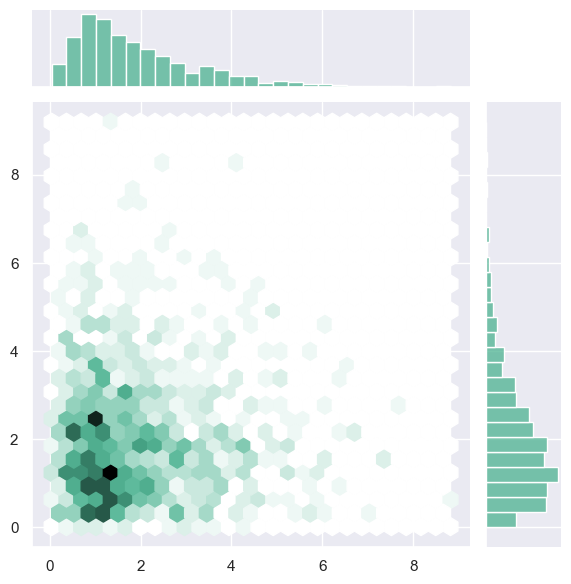

In [75]:
rs = np.random.RandomState(df['킬로미터당원가'])
x = rs.gamma(2, size=1000)

rs2 = np.random.RandomState(df['일일대당원가'])
y = rs2.gamma(2, size=1000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Glyph 53420 (\N{HANGUL SYLLABLE KIL}) missing from current font.
  f.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  f.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  f.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  f.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  f.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  f.tight_layout()
C:\P

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53420 (\N{HANGUL SYLLABLE KIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\l

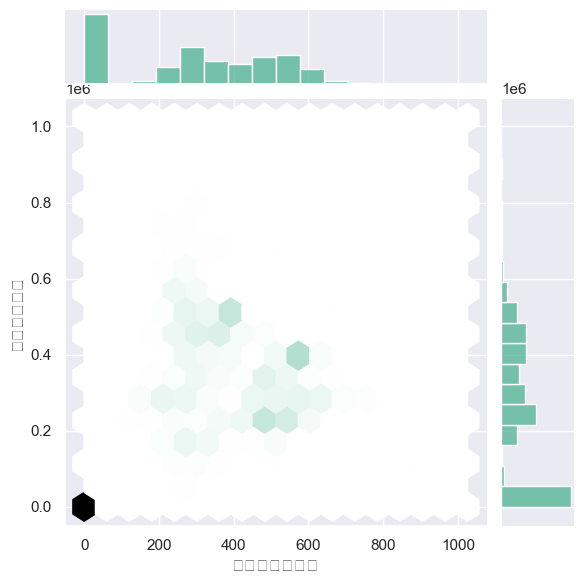

In [84]:
sns.jointplot(x='킬로미터당원가', y='일일대당원가', data=df, kind="hex", color="#4CB391")

In [87]:
query_expr = '일일대당원가 >= 10 and 킬로미터당원가 >= 10'
df3 = df.query(query_expr)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Glyph 53420 (\N{HANGUL SYLLABLE KIL}) missing from current font.
  f.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  f.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  f.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  f.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  f.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  f.tight_layout()
C:\P

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53420 (\N{HANGUL SYLLABLE KIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\l

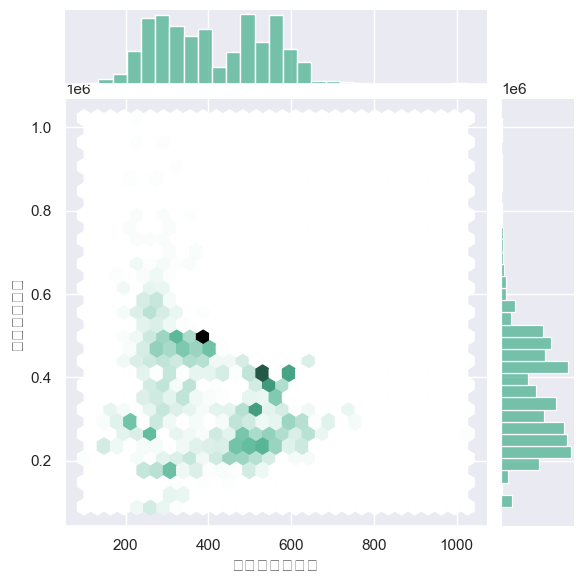

In [88]:
sns.jointplot(x='킬로미터당원가', y='일일대당원가', data=df3, kind="hex", color="#4CB391")

<AxesSubplot:xlabel='일일대당원가', ylabel='킬로미터당원가'>

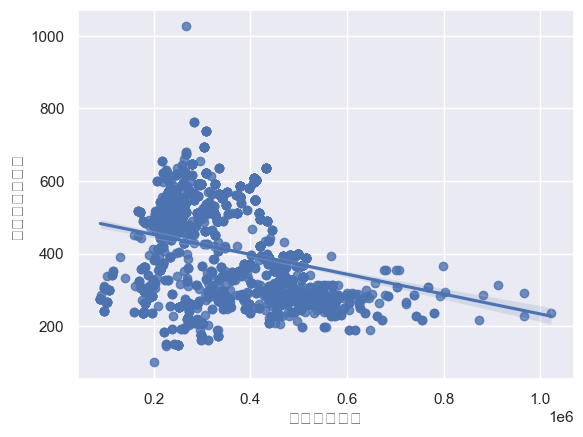

In [89]:
sns.regplot(x='일일대당원가', y='킬로미터당원가', data=df3)

In [90]:
from scipy import stats

In [91]:
stats.spearmanr(df['일일대당원가'], df['킬로미터당원가'])

SpearmanrResult(correlation=0.5447912136453805, pvalue=7.061624648702272e-253)

In [92]:
r = stats.spearmanr(df['일일대당원가'], df['킬로미터당원가'])[0]
p = stats.spearmanr(df['일일대당원가'], df['킬로미터당원가'])[1]

Text(100000, 900, 'r=0.5448, p=0.0000')

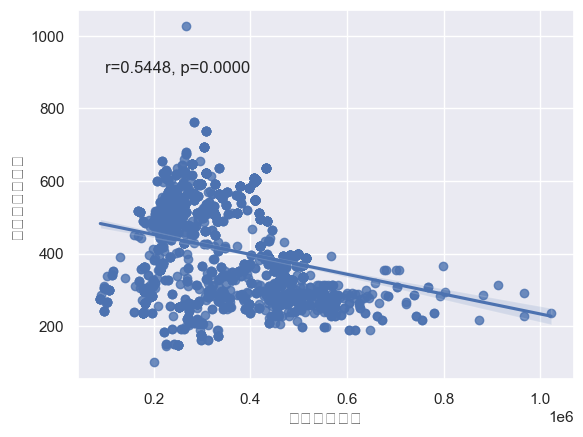

In [96]:
sns.regplot(x='일일대당원가', y='킬로미터당원가', data=df3)
plt.text(x=100000, y=900, s='r=%.4f, p=%.4f' %(r, p))

Text(100000, 900, 'r=0.5448, p=0.0000')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\

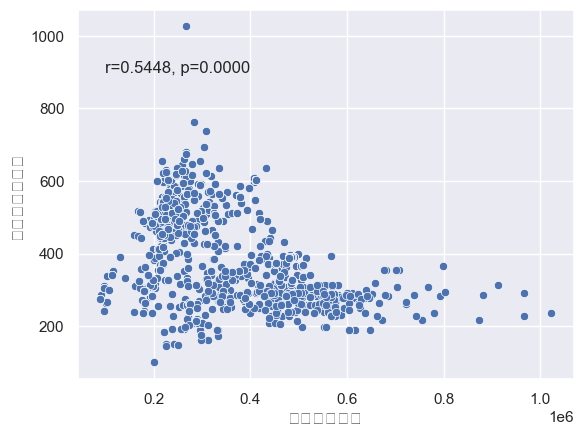

In [97]:
sns.scatterplot(x='일일대당원가', y='킬로미터당원가', data=df3)
plt.text(x=100000, y=900, s='r=%.4f, p=%.4f' %(r, p))

<AxesSubplot:xlabel='clarity', ylabel='carat'>

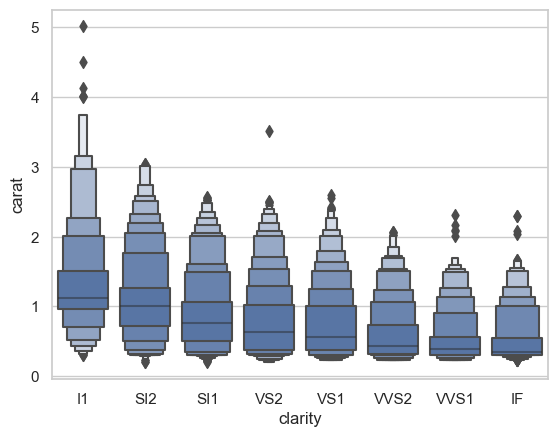

In [98]:
import seaborn as sns
sns.set_theme(style="whitegrid")

diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(x="clarity", y="carat",
              color="b", order=clarity_ranking,
              scale="linear", data=diamonds)